# Menggunakan Library Tensorflow

In [61]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logging
logging.getLogger('matplotlib.font_manager').disable = True
import random

seed_value = 48
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

In [62]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [63]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot', 'Coat']

In [64]:
## Melihat jumlah data train

train_images.shape
## ada 60.000 gambar pada training set, dan setiap gambar memiliki ukuran 28x28

(60000, 28, 28)

In [65]:
train_labels ## Label dari gambar


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [66]:
test_images.shape

(10000, 28, 28)

In [67]:
len(test_labels)

10000

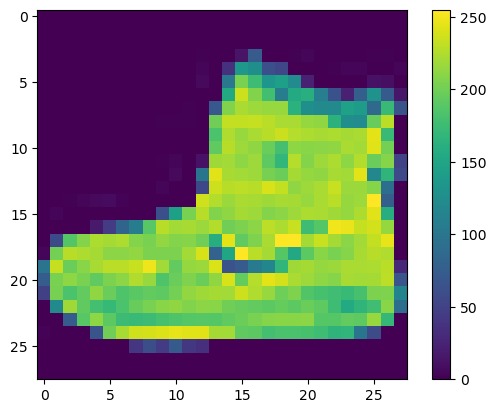

In [68]:
plt.figure() ## Membuat sebuah figure baru untuk plot
plt.imshow(train_images[0])
plt.colorbar() ## Menambahkan colorbar di samping gambar
plt.grid(False) ## Mematikan grid pada plot
plt.show() ## Menampilkan plot gambar

In [69]:
# Reshape data jika model memerlukan data dalam bentuk matriks 2D
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255

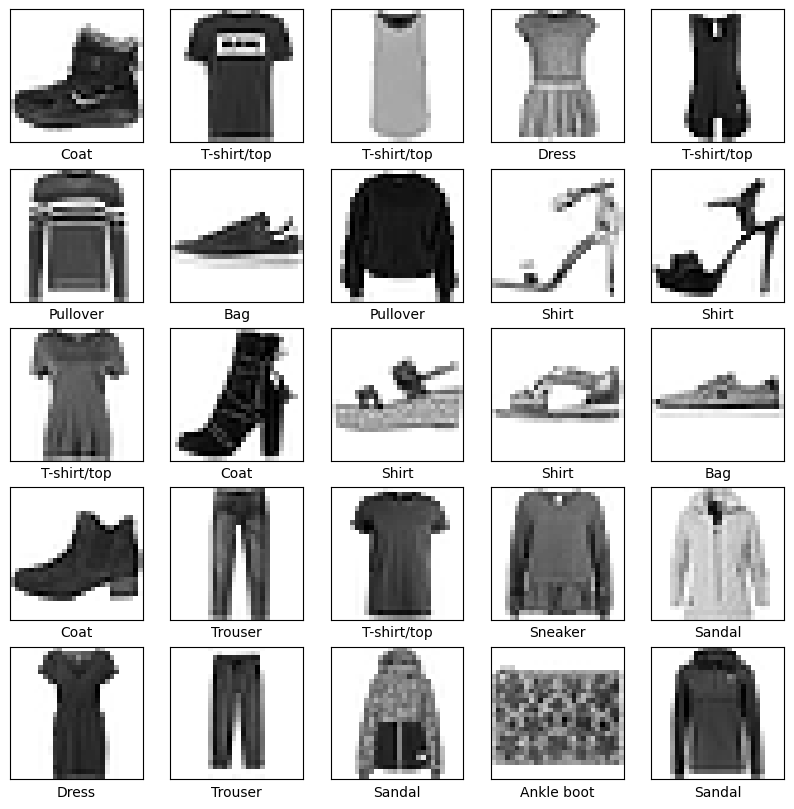

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # Set the figure size to 10x10
for i in range(25):  # Loop to display the first 25 images
    plt.subplot(5, 5, i + 1)  # Place the image in a subplot
    plt.xticks([])  # Remove ticks on the x-axis
    plt.yticks([])  # Remove ticks on the y-axis
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # Display the image
    plt.xlabel(class_names[train_labels[i]])  # Add label

plt.show()  # Display all the plotted images

In [71]:
model_tf = tf.keras. Sequential([ ## Membuat model Seq
tf.keras. layers. Input(shape=(28, 28)), ## Menambal
tf.keras. layers. Flatten(), ## Mengubah gambar 2D
tf.keras. layers. Dense(128, activation='relu'),
tf.keras.layers. Dropout(0.3),
tf.keras. layers. Dense(300, activation='relu'), #
tf.keras.layers.Dropout(0.3),
tf.keras. layers. Dense(10) ## Lapisan Dense output
])

In [72]:
model_tf.compile(optimizer='adam', ## Menggunakan optimizer Adam untuk memperbarui
loss=tf.keras.losses. SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy']) ## Memilih akurasi sebagai metrik untuk memonit

In [73]:
from keras.callbacks import EarlyStopping

# Configure EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,              # Stop training after 5 epochs with no improvement
    min_delta=0.0001,        # Minimum change to qualify as an improvement
    restore_best_weights=True # Restore model weights from the epoch with the best validation accuracy
)

# Train the model with EarlyStopping
history = model_tf.fit(
    train_images, train_labels,
    epochs=40,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7303 - loss: 0.7522 - val_accuracy: 0.8300 - val_loss: 0.4604
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8331 - loss: 0.4543 - val_accuracy: 0.8419 - val_loss: 0.4196
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8483 - loss: 0.4147 - val_accuracy: 0.8549 - val_loss: 0.4000
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8564 - loss: 0.3891 - val_accuracy: 0.8557 - val_loss: 0.3935
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8625 - loss: 0.3725 - val_accuracy: 0.8611 - val_loss: 0.3864
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8645 - loss: 0.3671 - val_accuracy: 0.8632 - val_loss: 0.3780
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3535 - val_accuracy: 0.8713 - val_loss: 0.3540
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8722 - loss: 0.3427 - 

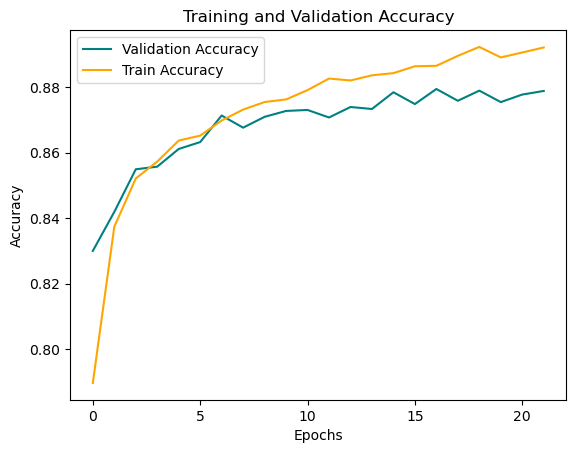

In [74]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation Accuracy')  # Fixed the label string
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')  # Plot training accuracy
plt.legend(loc="upper left")
plt.xlabel('Epochs')  # Optional: Add x-axis label
plt.ylabel('Accuracy')  # Optional: Add y-axis label
plt.title('Training and Validation Accuracy')  # Optional: Add a title
plt.show()

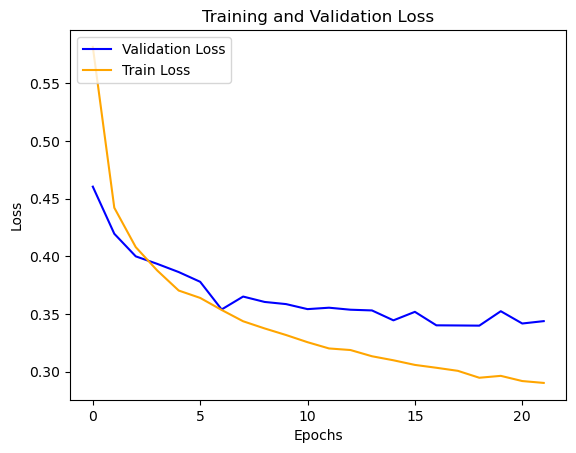

In [75]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')  # Fixed the label string
plt.plot(history.history['loss'], color='orange', label='Train Loss')  # Fixed the quote for 'loss'
plt.legend(loc="upper left")
plt.xlabel('Epochs')  # Optional: Add x-axis label
plt.ylabel('Loss')  # Optional: Add y-axis label
plt.title('Training and Validation Loss')  # Optional: Add a title
plt.show()

In [76]:
test_loss, test_acc_tf = model_tf.evaluate(test_images, test_labels, verbose=2) 

print('\nTest accuracy:', test_acc_tf) ## Menampilkan akurasi model pada data pengujian

313/313 - 0s - 1ms/step - accuracy: 0.8794 - loss: 0.3403

Test accuracy: 0.8794000148773193


In [77]:
probability_model = tf.keras.Sequential([model_tf,
tf.keras. layers. Softmax()])
## Membuat model baru yang menambahkan Layer Softmax di akhir model yang sudah dilatih

In [78]:
predictions_tf = probability_model.predict(test_images)
## Membuat prediksi probabilitas untuk data pengujian (test_images) menggunakan model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [79]:
predictions_tf[0]

array([1.1577694e-07, 1.3106940e-07, 8.1991493e-06, 3.1100512e-07,
       4.8237293e-06, 4.7762779e-04, 3.6001834e-06, 5.9326719e-02,
       1.1586994e-05, 9.4016689e-01], dtype=float32)

In [80]:
np.argmax(predictions_tf[0])
## Mengambil indeks kelas dengan pro

9

In [81]:
test_labels[0]

9

In [82]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image(i, predictions_array, true_label, img):
    # No need to index true_label here, as it's already a single integer
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),  # Added percentage calculation
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')  # Fixed the quote for 'blue'



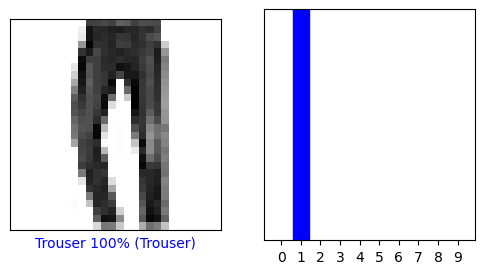

In [83]:
import matplotlib.pyplot as plt

i = 5  # Set the index for the image to predict
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(i, predictions_tf[i], test_labels[i], test_images[i])  # Pass the specific true label for the image

plt.subplot(1, 2, 2)
plot_value_array(i, predictions_tf[i], test_labels[i])  # Pass the specific true label for the image

plt.show()

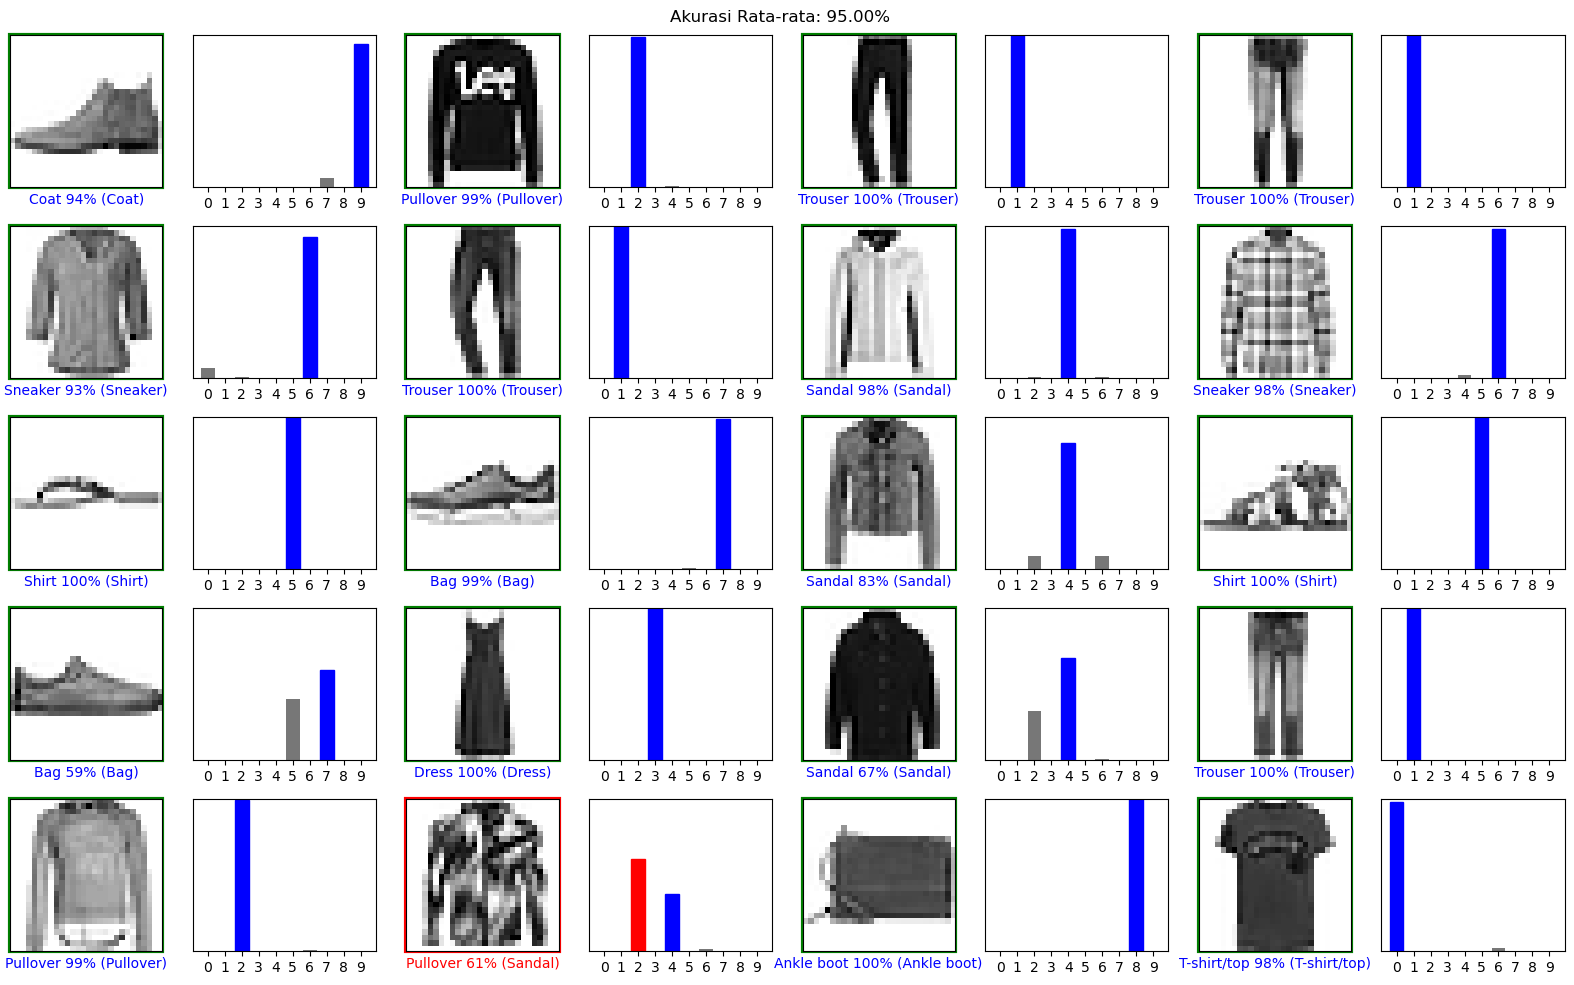

In [84]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

# Assuming predictions_tf, test_labels, and test_images are already defined

# Calculate correct predictions
correct_predictions = [np.argmax(predictions_tf[i]) == test_labels[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100

# Create figure for plotting
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_tf[i], test_labels[i], test_images[i])  # Pass the specific true label

    # Set border color based on correctness of prediction
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_tf[i], test_labels[i])  # Pass the specific true label

# Set the title for the entire figure
plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

In [85]:

img = test_images[1] ## mencetak dimensi gambar kedua dari dataset pengujian

print(img.shape)

(28, 28, 1)


In [86]:
img = (np.expand_dims (img, 0)) ## menambahkan dimensi batch pada gambar agar sesuai
## dengan format input yang diharapkan oleh model,

print(img.shape)

(1, 28, 28, 1)


In [87]:
predictions_single = probability_model.predict(img) ## m

print(predictions_single) ## Mencetak hasil prediksi, ya

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[1.5061269e-06 7.6551280e-14 9.8749930e-01 4.3755406e-11 7.6176203e-03
  2.6195879e-17 4.8816320e-03 1.2393831e-20 6.3280535e-12 9.9238876e-18]]


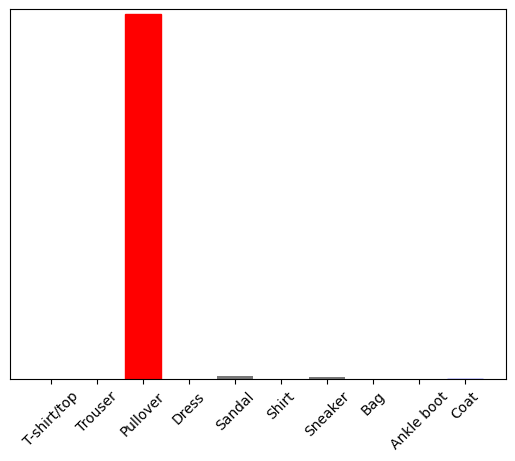

In [88]:
plot_value_array(1, predictions_single[0], test_labels[0])  # Pass the specific true label for the first prediction

# Set the x-ticks to the class names with rotation
_ = plt.xticks(range(10), class_names, rotation=45)  # Adjust the range based on the number of classes

# Show the plot
plt.show()  # Display the plot on the screen

In [89]:
np.argmax(predictions_single[0])

2

In [91]:
import pandas as pd
import numpy as np

# Create a DataFrame for test results
df_test = pd.DataFrame({
    'Target': test_labels,  # Original labels
    'Predicted': np.argmax(predictions_tf, axis=1),  # Predicted labels
    'Proba_0': predictions_tf[:, 0],  # Probability for class 0 (e.g., 'Other')
    'Proba_1': predictions_tf[:, 1]   # Probability for class 1 (e.g., 'T-shirt/top')
})

# Reshape images into a 2D array (number of images x 784 pixels)
pixels = test_images.reshape(len(test_images), -1)

# Create a DataFrame for pixel columns
df_pixels = pd.DataFrame(pixels, columns=[f'pixel{i+1}' for i in range(28 * 28)])

# Concatenate the two DataFrames
df_test = pd.concat([df_test, df_pixels], axis=1)


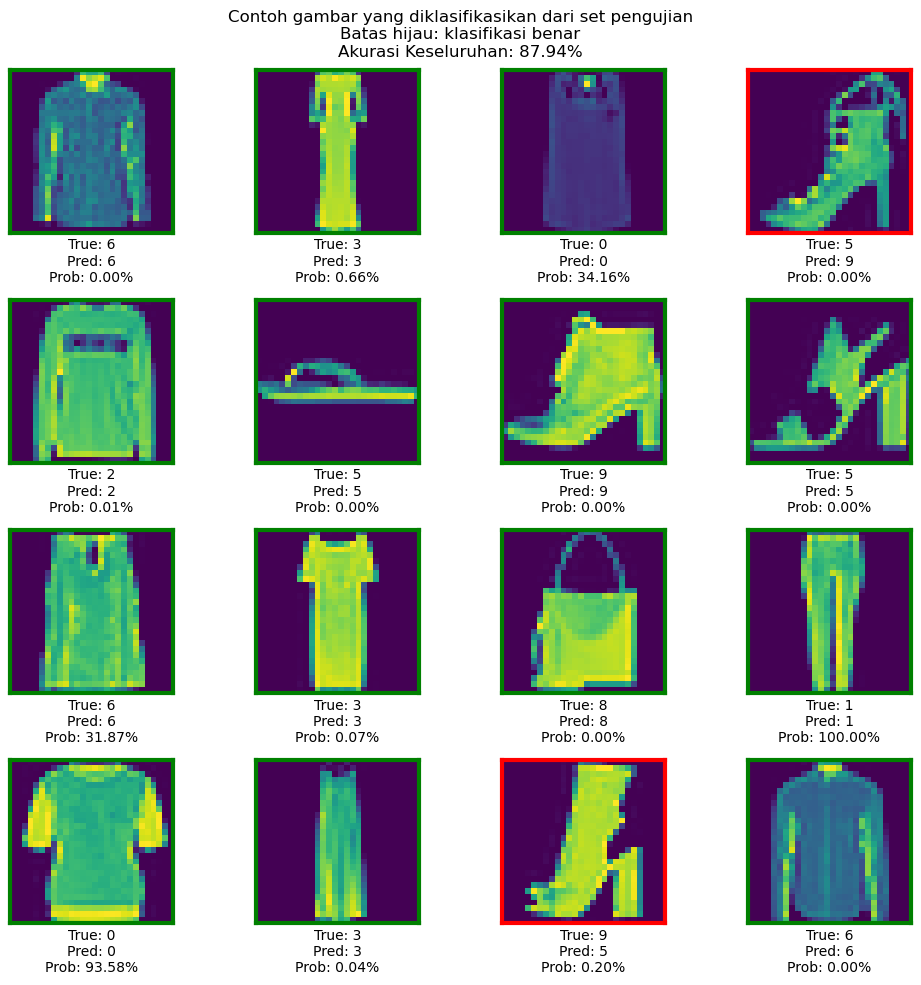

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample 16 random entries from df_test
df_plot = df_test.sample(16, random_state=42).copy()  # Adjust according to your needs

# Create subplots for displaying images
fig, ax = plt.subplots(4, 4, figsize=(10, 10))

# Calculate average accuracy
rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]  # Probability for class 'Other'
    p1 = df_plot['Proba_1'].values[i]  # Probability for class 'T-shirt/top'

    # Extract predicted class and highest probability
    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100

    # Extract pixel data and display the image
    pixels = df_plot[[f'pixel{j}' for j in range(1, 28 * 28 + 1)]].values[i].reshape(28, 28)
    axi.imshow(pixels, cmap='viridis')

    # Display true label, predicted class, and probability on the image
    true_class = df_plot['Target'].values[i]  # Get the true class for the current sample
    axi.set(xticks=[], yticks=[],
            xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%")

    # Set border color based on correctness of prediction
    edge_color = 'green' if predicted_class == true_class else 'red'
    axi.spines[:].set_edgecolor(edge_color)
    axi.spines[:].set_linewidth(3)

# Set title with average accuracy
fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
              f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')
fig.tight_layout()
plt.show()

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  # For Multi-Layer Perceptron (MLP) Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf

# Disable warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# Fetch the Fashion-MNIST dataset from OpenML
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)

# Split the Fashion MNIST dataset into training and testing sets
train_images = fashion_mnist.data[:60000]  # train_images contains the first 60,000 images for training
train_labels = fashion_mnist.target[:60000].astype(int)  # train_labels contains the first 60,000 labels
test_images = fashion_mnist.data[60000:]  # test_images contains the last 10,000 images for testing
test_labels = fashion_mnist.target[60000:].astype(int)  # test_labels contains the last 10,000 labels

# Normalize pixel values of the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [94]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, log_loss
from sklearn.neural_network import MLPClassifier
import numpy as np

# Split train_images into training and validation sets
train_images_split, val_images, train_labels_split, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42  # Adjust according to your needs
)

# Define the MLP model with one hidden layer of size 128 neurons
model_sklearn = MLPClassifier(
    hidden_layer_sizes=(128,),  # Corrected to a single layer of 128 neurons
    activation='relu',  # ReLU activation function for hidden layers
    alpha=0.0001,  # L2 regularization (penalty) with value 0.0001
    learning_rate_init=0.001,  # Initial learning rate
    early_stopping=True,  # Stop training if no improvement
    validation_fraction=0.2,  # Set aside 20% of training data for validation
    n_iter_no_change=10,  # Stop training if no change in validation score
    random_state=42,  # Adjust according to your needs
    verbose=True  # Display detailed information during training
)

# Train the model and obtain loss curves
model_sklearn.fit(train_images_split, train_labels_split)
training_loss = model_sklearn.loss_curve_

# Optional: Print training loss for verification
print(training_loss)

Iteration 1, loss = 0.64885372
Validation score: 0.834583
Iteration 2, loss = 0.44838504
Validation score: 0.841458
Iteration 3, loss = 0.40225516
Validation score: 0.850729
Iteration 4, loss = 0.37845731
Validation score: 0.846875
Iteration 5, loss = 0.35286110
Validation score: 0.867812
Iteration 6, loss = 0.33734733
Validation score: 0.862812
Iteration 7, loss = 0.32129204
Validation score: 0.875000
Iteration 8, loss = 0.30840915
Validation score: 0.870833
Iteration 9, loss = 0.29725014
Validation score: 0.874687
Iteration 10, loss = 0.29045495
Validation score: 0.878750
Iteration 11, loss = 0.27943005
Validation score: 0.876250
Iteration 12, loss = 0.27189186
Validation score: 0.883646
Iteration 13, loss = 0.25883347
Validation score: 0.880938
Iteration 14, loss = 0.25299196
Validation score: 0.874583
Iteration 15, loss = 0.24849231
Validation score: 0.880417
Iteration 16, loss = 0.24323956
Validation score: 0.881979
Iteration 17, loss = 0.23633018
Validation score: 0.884479
Iterat

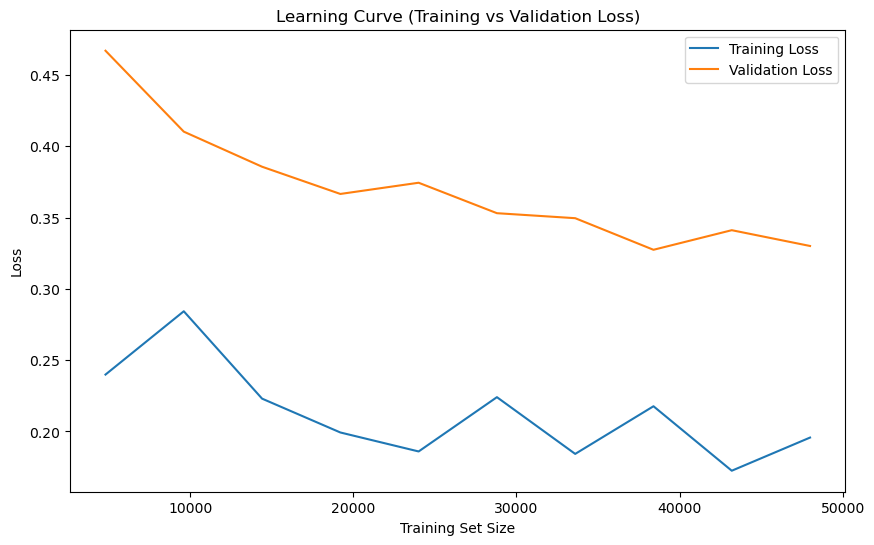

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Using learning_curve to compute training and validation loss scores at various sizes
train_sizes, train_scores, val_scores = learning_curve(
    model_sklearn, 
    train_images, 
    train_labels, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5,
    scoring='neg_log_loss', 
    random_state=42, 
    n_jobs=-1  # Use all available cores
)

# Calculate mean training and validation loss at each point
train_loss_mean = -train_scores.mean(axis=1)
val_loss_mean = -val_scores.mean(axis=1)

# Create a plot for the learning curve with training data size on the X-axis and loss on the Y-axis
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(train_sizes, train_loss_mean, label='Training Loss')  # Plot training loss
plt.plot(train_sizes, val_loss_mean, label='Validation Loss')  # Plot validation loss
plt.xlabel('Training Set Size')  # Label for X-axis
plt.ylabel('Loss')  # Label for Y-axis
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.show()  # Display the plot

In [96]:
# Menggunakan model yang telah dilatih untuk memprediksi Label pada data testi
test_predictions = model_sklearn. predict(test_images)
# Menghitung akurasi model pada data testing dengan membandingkan prediksi dan
test_acc_sklearn = accuracy_score(test_labels, test_predictions)
# Menampilkan nilai akurasi pada data testing
print('\nTest accuracy:', test_acc_sklearn)


Test accuracy: 0.8816


In [97]:
# Assuming test_predictions has been defined earlier in the code
print("\nClassification Report:\n", classification_report(test_labels, test_predictions))

# Get the predicted probabilities for the test images
predictions_proba = model_sklearn.predict_proba(test_images)

# Optional: Print the predicted probabilities for verification
print("\nPredicted Probabilities:\n", predictions_proba)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.78      0.82      0.80      1000
           3       0.85      0.91      0.88      1000
           4       0.82      0.80      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.77      0.63      0.69      1000
           7       0.94      0.95      0.94      1000
           8       0.98      0.94      0.96      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Predicted Probabilities:
 [[6.20078083e-09 5.05071872e-12 1.11648694e-05 ... 4.46343177e-03
  1.25605258e-05 9.95082630e-01]
 [3.40137882e-03 1.33988157e-13 9.28332202e-01 ... 1.11194921e-16
  2.70105758e-11 1.06678

In [98]:
# Mendapatkan probabilitas prediksi
predictions_sklearn = model_sklearn.predict_proba(test_images)
print(predictions_sklearn[0])  # Menampilkan probabilitas prediksi untuk gambar
print("Predicted label for first image:", np.argmax(predictions_sklearn[0]))  # Menampilkan label prediksi

# Fixed typo in the comment
print("Actual label for first image:", test_labels.iloc[0])  # Menampilkan label aktual

[6.20078083e-09 5.05071872e-12 1.11648694e-05 1.89398399e-07
 1.13872886e-06 4.28494059e-04 3.84885414e-07 4.46343177e-03
 1.25605258e-05 9.95082630e-01]
Predicted label for first image: 9
Actual label for first image: 9


In [108]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array[i])  # Access the i-th prediction correctly
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100 * np.max(predictions_array[i]):.2f}% ({class_names[true_label]})", color=color)

# Fungsi plot_value_array menampilkan grafik
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i]  # Fixed typo: true_labelliloc -> true_label.iloc
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    # Memberi warna merah pada bar yang menunjukkan prediksi, dan biru pada bar yang menunjukkan Label sebenarnya
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

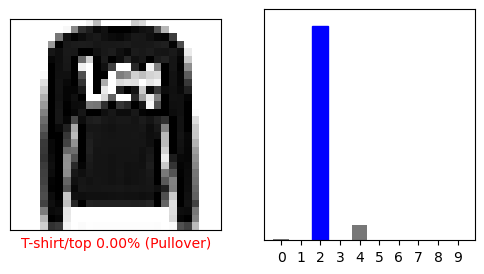

In [100]:
i = 1 # Menentukan indeks gambar yang akan ditampilkan (gambar ke-1)
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1) # Membuat subplot pertama (di sebelah kiri) untuk menampilkan gambar beserta Label prediksi dan Label asli
plot_image(i, predictions_sklearn[i], test_labels, test_images)
plt.subplot(1, 2, 2) # Membuat subplot kedua (di sebelah kanan) untuk menampilkan grafik batang probabilitas prediksi setiap kelas
plot_value_array(i, predictions_sklearn[i], test_labels)
plt.show() # Menampilkan semua grafik yang telah dibuat

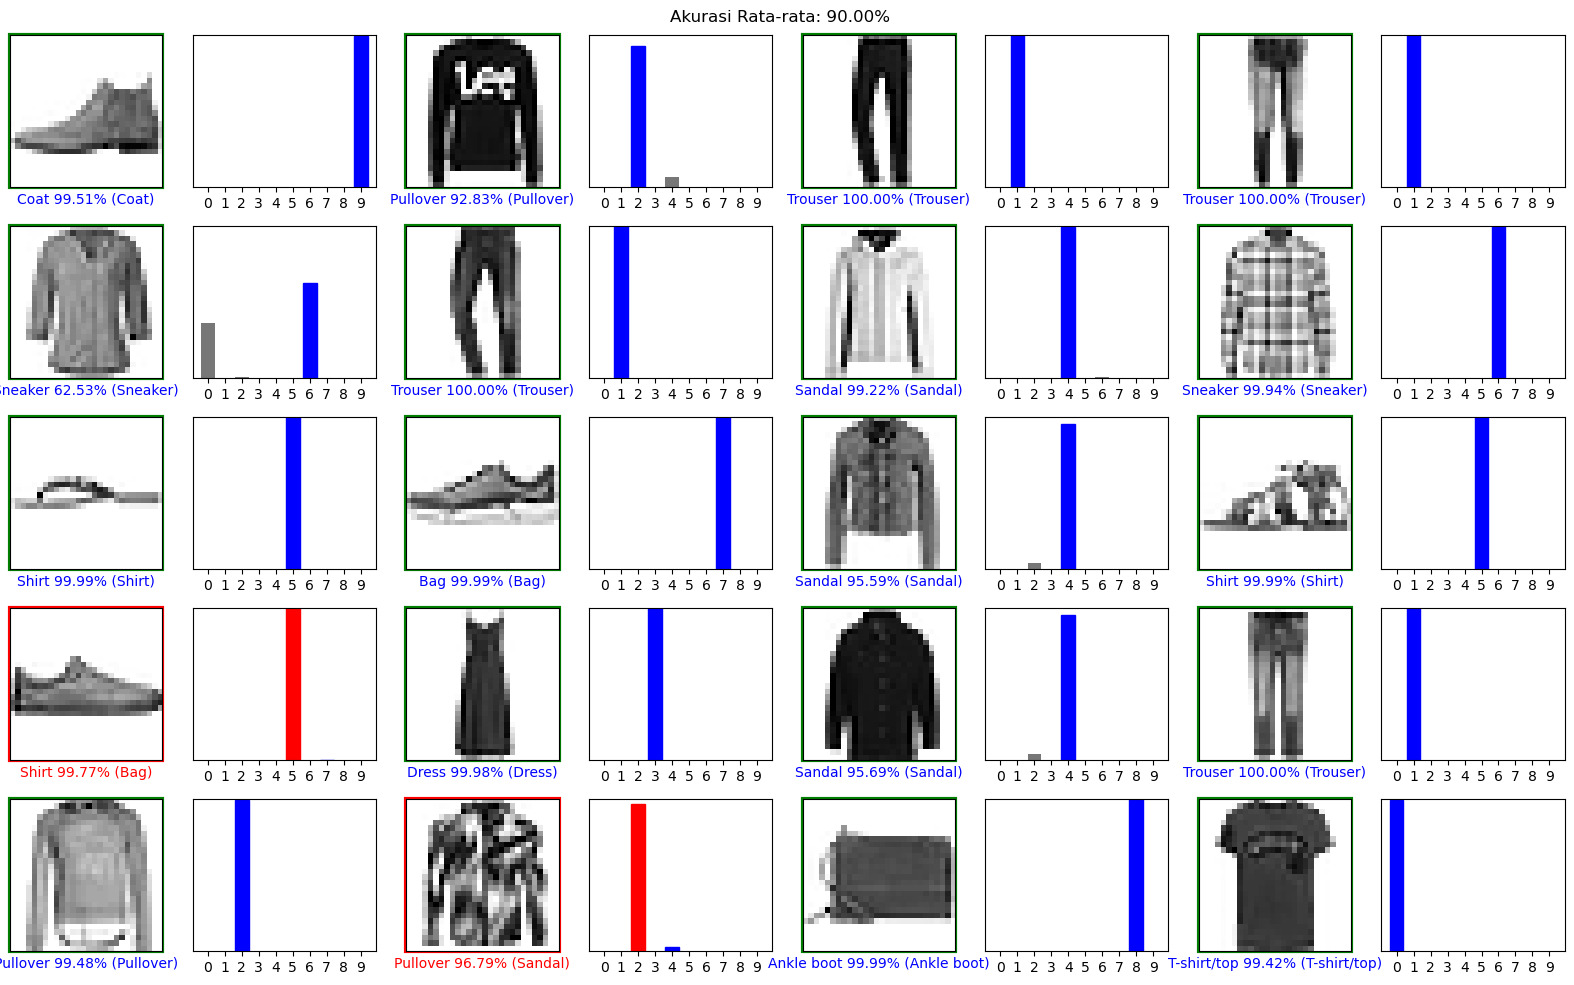

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Number of rows and columns for the grid
num_rows = 5
num_cols = 4
num_images = min(num_rows * num_cols, len(predictions_sklearn))  # Ensure num_images does not exceed available predictions

# Calculate whether predictions are correct for the first 'num_images' displayed images
correct_predictions = [np.argmax(predictions_sklearn[i]) == test_labels.iloc[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100  # Average accuracy of displayed images

# Set up the figure and subplots
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    # Left subplot for the image with color border
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_sklearn, test_labels, test_images)  # Pass the entire predictions_sklearn array
    
    # Fixed the border color assignment
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)

    # Right subplot for the prediction probabilities
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_sklearn[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

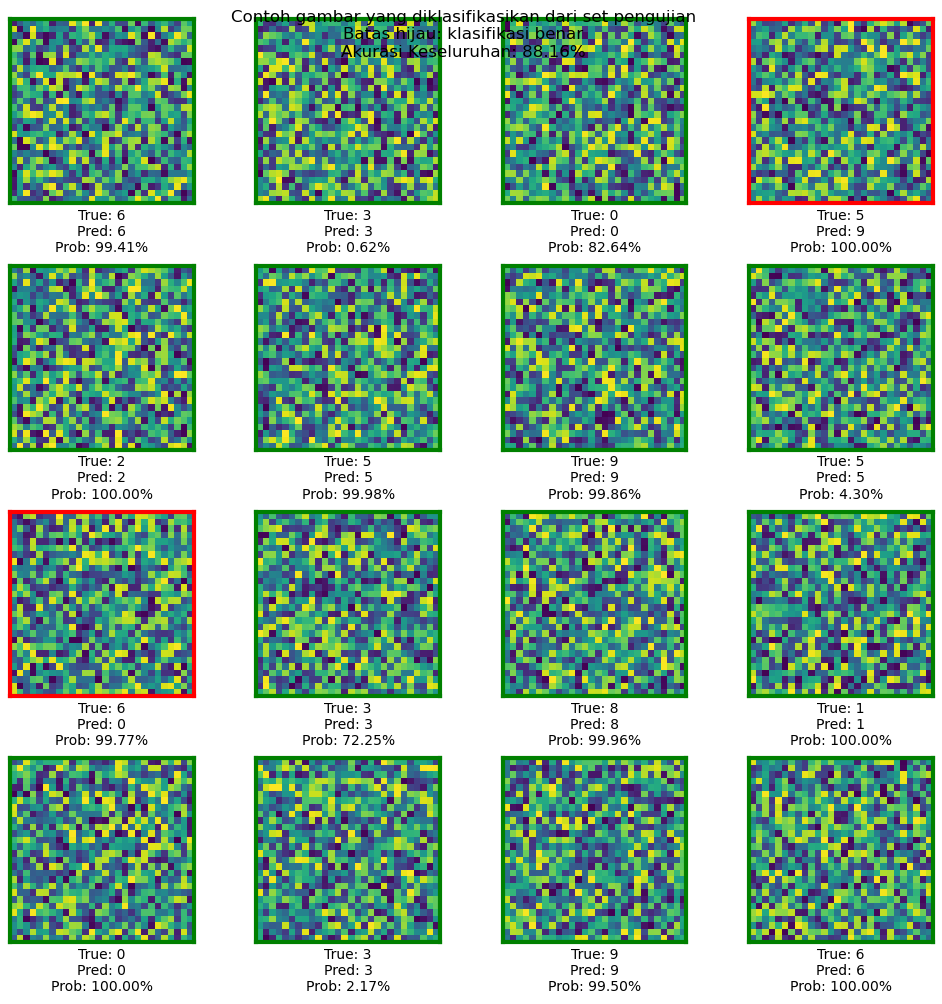

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Membuat contoh data untuk df_test
n_samples = 10000

df_test = pd.DataFrame({
    "Target": test_labels,  # Label asli
    'Predicted': np.argmax(predictions_sklearn, axis=1),  # Label prediksi
    'Proba_0': predictions_sklearn[:, 0],  # Probabilitas kelas 0 (misal 'Other')
    'Proba_1': predictions_sklearn[:, 1]  # Probabilitas kelas 1 (misal 'T-shirt/top')
})

# Normalisasi probabilitas agar Proba_0 + Proba_1 = 1 untuk setiap sampel
df_test['Proba_0'] = df_test['Proba_0'] / (df_test['Proba_0'] + df_test['Proba_1'])

# Membuat data piksel sintetis (gambar 28x28 di-flatten menjadi 784 kolom)
for i in range(1, 28 * 28 + 1):
    df_test[f'pixel{i}'] = np.random.randint(0, 256, n_samples)

# Kode visualisasi yang diinginkan
df_plot = df_test.sample(16, random_state=42).copy()  # sesuaikan 2 digit npm terakhir
# atau 1 digit npm terakhir

rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
fig.tight_layout()

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]  # Mengambil probabilitas untuk kelas e dan 1 dari DataFrame
    p1 = df_plot['Proba_1'].values[i]
    predicted_class = df_plot['Predicted'].values[i]  # Mengambil kelas yang diprediksi dan kelas yang benar dari DataFrame
    prediction_probability = max(p0, p1) * 100  # Menghitung probabilitas prediksi tertinggi (dalam persen)
    true_class = df_plot['Target'].values[i]
    pixels = df_plot[[f'pixel{j}' for j in range(1, 28 * 28 + 1)]].values[i].reshape(28, 28)
    axi.imshow(pixels, cmap='viridis')  # Menampilkan gambar dengan colormap 'viridis' pada subplot
    axi.set(xticks=[], yticks=[],
            xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%")
    edge_color = 'green' if predicted_class == true_class else 'red'  # Menentukan warna border berdasarkan apakah prediksi benar
    # Menetapkan warna dan ketebalan garis pada spines (border) untuk setiap subplot
    for spine in axi.spines.values():
        spine.set_edgecolor(edge_color)
        spine.set_linewidth(3)

fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')

plt.show()

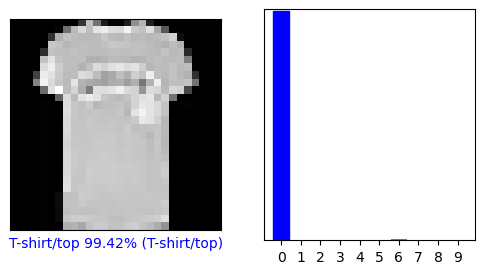

In [113]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    # Ambil true Label dan gambar berdasarkan index 'i'
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28)

    # Menampilkan gambar
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')  # Menggunakan 'gray' untuk gradasi yang lebih baik

    # Mendapatkan Label prediksi
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    # Memberi Label pada gambar
    plt.xlabel(f"{class_names[predicted_label]} {100 * np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    # Memberi warna pada bar
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Menampilkan gambar prediksi pertama, prediksi Label, dan array
i = 19
plt.figure(figsize=(6, 3))

# Plot gambar prediksi
plt.subplot(1, 2, 1)
plot_image(i, predictions_sklearn[i], test_labels, test_images)

# Plot confidence array
plt.subplot(1, 2, 2)
plot_value_array(i, predictions_sklearn[i], test_labels)

# Simpan dan tampilkan plot
plt.show()

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menyimpan gambar saja (tanpa prediksi dan Label)
def save_image_only(i, true_label, img):
    # Ambil gambar berdasarkan indeks 'i' dan ubah menjadi ukuran 28x28
    img = img.iloc[i].values.reshape(28, 28)

    # Plot tanpa sumbu, Label, dan grid
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Menghilangkan sumbu
    plt.savefig(f"image_only_{i}.jpeg", bbox_inches='tight', pad_inches=0)
    plt.close()  # Menutup plot setelah menyimpan untuk menghindari tampilan yang tidak diinginkan



In [115]:
import pandas as pd
from sklearn.metrics import accuracy_score

# test_acc_tf = model_tf.evaluate(test_images, test_labels, verbose=2)[1]
# test_acc_sklearn = accuracy_score(test_labels, test_predictions_sklearn)

# Membuat dictionary hasil evaluasi
data = {
    'Model': ["TensorFlow", "Scikit-Learn"],  # Fixed quotes
    'Accuracy': [test_acc_tf, test_acc_sklearn],  # Menggunakan hasil evaluasi
    'Architecture': ['Neural Network (2 hidden layers)', "MLP (2 hidden layers)"],  # Fixed quotes
    'Early Stopping': ['Yes', 'Yes']
}

# Membuat DataFrame untuk menampilkan tabel perbandingan
comparison_df = pd.DataFrame(data)

# Menentukan model terbaik berdasarkan akurasi tertinggi
best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]

# Menampilkan tabel perbandingan
print("Comparison of Model Performance:")
print(comparison_df)

# Menampilkan model terbaik
print("\nBest Model Based on Accuracy:")
print(best_model)

Comparison of Model Performance:
          Model  Accuracy                      Architecture Early Stopping
0    TensorFlow    0.8794  Neural Network (2 hidden layers)            Yes
1  Scikit-Learn    0.8816             MLP (2 hidden layers)            Yes

Best Model Based on Accuracy:
Model                      Scikit-Learn
Accuracy                         0.8816
Architecture      MLP (2 hidden layers)
Early Stopping                      Yes
Name: 1, dtype: object


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Assume you have a Keras model defined and trained
# For example, let's define a simple model
def create_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),  # Input shape for Fashion MNIST
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train your model (assuming model_sklearn is not used here)
model_tf = create_model()

# Train your model here (model_tf.fit(...))

# Save the Keras model to .h5 format
model_tf.save("best_model.h5")